In [4]:
import csv
from pandas import DataFrame
import numpy as np
import pandas as pd
import glob
from os import listdir
import dateutil
from array import *
import random
from collections import Counter 

In [5]:
from fuzzywuzzy import fuzz

C:\Users\taylo\Anaconda3\envs\dsi\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [6]:
import jovian

In [7]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "taylorjsimpson18/jeopardy-quiz" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/taylorjsimpson18/jeopardy-quiz


In [8]:
pwd

'C:\\Users\\taylo\\desktop\\ga\\DSI_Assignments_NEW\\Jeopardy'

In [9]:
>>> import matplotlib.pyplot as plt

In [10]:
#Reads in S1 DF
JeopardyS1 = pd.read_csv(r"C:\Users\taylo\Desktop\GA\DSI_Assignments_NEW\Jeopardy\jeopardy_clues\season1.tsv", sep="\t")

In [11]:
#Confirms S1 DF
JeopardyS1

,round,value,daily_double,category,comments,answer,question,air_date,notes
0,1,100,no,LAKES & RIVERS,-,River mentioned most often in the Bible,the Jordan,1984-09-10,-
1,1,200,no,LAKES & RIVERS,-,Scottish word for lake,loch,1984-09-10,-
2,1,400,no,LAKES & RIVERS,-,American river only 33 miles shorter than the ...,the Missouri,1984-09-10,-
3,1,500,no,LAKES & RIVERS,-,"World's largest lake, nearly 5 times as big as...",the Caspian Sea,1984-09-10,-
4,1,100,no,INVENTIONS,-,Marconi's wonderful wireless,the radio,1984-09-10,-
5,1,200,no,INVENTIONS,-,"In 1869 an American minister created this ""ori...",the rickshaw,1984-09-10,-
6,1,300,no,INVENTIONS,-,A 1920's hunting trip to Canada inspired Birds...,freezing,1984-09-10,-
7,1,400,no,INVENTIONS,-,This fastener gets its name from a brand of ga...,a zipper,1984-09-10,-
8,1,100,no,ANIMALS,-,These rodents first got to America by stowing ...,rats,1984-09-10,-
9,1,200,no,ANIMALS,-,"There are about 40,000 muscles & tendons in th...",the trunk,1984-09-10,-


In [12]:
#Creates df for all questions from S1-35
file_name = r"C:\Users\taylo\Desktop\GA\DSI_Assignments_NEW\Jeopardy\jeopardy_clues\season{}.tsv"
Jeopardy1_35 = pd.DataFrame(columns=['round','value','daily_double','category','comments','answer','question', 'air_data', 'notes'])
for i in range(1, 35):
    temp = pd.read_csv(file_name.format(i), sep = "\t", error_bad_lines = False)
    Jeopardy1_35 = Jeopardy1_35.append(temp, sort = False)


In [13]:
#Confirms df created
Jeopardy1_35

,round,value,daily_double,category,comments,answer,question,air_data,notes,air_date
0,1,100,no,LAKES & RIVERS,-,River mentioned most often in the Bible,the Jordan,NaN,-,1984-09-10
1,1,200,no,LAKES & RIVERS,-,Scottish word for lake,loch,NaN,-,1984-09-10
2,1,400,no,LAKES & RIVERS,-,American river only 33 miles shorter than the ...,the Missouri,NaN,-,1984-09-10
3,1,500,no,LAKES & RIVERS,-,"World's largest lake, nearly 5 times as big as...",the Caspian Sea,NaN,-,1984-09-10
4,1,100,no,INVENTIONS,-,Marconi's wonderful wireless,the radio,NaN,-,1984-09-10
5,1,200,no,INVENTIONS,-,"In 1869 an American minister created this ""ori...",the rickshaw,NaN,-,1984-09-10
6,1,300,no,INVENTIONS,-,A 1920's hunting trip to Canada inspired Birds...,freezing,NaN,-,1984-09-10
7,1,400,no,INVENTIONS,-,This fastener gets its name from a brand of ga...,a zipper,NaN,-,1984-09-10
8,1,100,no,ANIMALS,-,These rodents first got to America by stowing ...,rats,NaN,-,1984-09-10
9,1,200,no,ANIMALS,-,"There are about 40,000 muscles & tendons in th...",the trunk,NaN,-,1984-09-10


In [14]:
#Confirms ALL seasons in df
Jeopardy1_35.tail()

,round,value,daily_double,category,comments,answer,question,air_data,notes,air_date
12041,2,800,no,FOUND IN TRANSLATION,(Alex: Each correct response will be a word--a...,"A facetious, often bawdy tribute banquet",a roast,NaN,-,2018-07-27
12042,2,1200,no,FOUND IN TRANSLATION,(Alex: Each correct response will be a word--a...,Irregular plural word for multiple layers of s...,strata,NaN,-,2018-07-27
12043,2,1600,no,FOUND IN TRANSLATION,(Alex: Each correct response will be a word--a...,To lean or tilt to one side,list (or slant),NaN,-,2018-07-27
12044,2,2000,no,FOUND IN TRANSLATION,(Alex: Each correct response will be a word--a...,Push the blue button in your GM car to get thi...,OnStar,NaN,-,2018-07-27
12045,3,0,no,AMERICAN HISTORY,-,The last survivor of this battle that started ...,the Battle of Lexington,NaN,-,2018-07-27


In [15]:
#Sees info of df
Jeopardy1_35.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337567 entries, 0 to 12045
Data columns (total 10 columns):
round           337567 non-null object
value           337567 non-null object
daily_double    337567 non-null object
category        337567 non-null object
comments        337567 non-null object
answer          337567 non-null object
question        337567 non-null object
air_data        0 non-null object
notes           337567 non-null object
air_date        337567 non-null object
dtypes: object(10)
memory usage: 28.3+ MB


In [16]:
#Checks out column names
Jeopardy1_35.columns

Index(['round', 'value', 'daily_double', 'category', 'comments', 'answer',
       'question', 'air_data', 'notes', 'air_date'],
      dtype='object')

In [17]:
len(Jeopardy1_35['category'])

337567

In [18]:
len(Jeopardy1_35['category'].unique())

41594

In [19]:
#Prints all unqiue categories
a = Jeopardy1_35['category'].unique()
len(a)

41594

In [20]:
#Gets counts for each uninque category in df
Jeopardy1_35['category'].value_counts()

SCIENCE                             842
LITERATURE                          794
AMERICAN HISTORY                    757
HISTORY                             701
SPORTS                              700
POTPOURRI                           679
BEFORE & AFTER                      656
WORD ORIGINS                        655
WORLD HISTORY                       635
WORLD GEOGRAPHY                     625
BUSINESS & INDUSTRY                 591
U.S. CITIES                         565
TRANSPORTATION                      549
RELIGION                            540
COLLEGES & UNIVERSITIES             539
ART                                 524
WORLD CAPITALS                      508
ANIMALS                             503
U.S. HISTORY                        495
U.S. GEOGRAPHY                      493
BOOKS & AUTHORS                     491
AUTHORS                             489
BODIES OF WATER                     481
STATE CAPITALS                      473
THE BIBLE                           469


In [21]:
#Gets 20 most popular categories from df
Jeopardy1_35['category'].value_counts().nlargest(20)

SCIENCE                    842
LITERATURE                 794
AMERICAN HISTORY           757
HISTORY                    701
SPORTS                     700
POTPOURRI                  679
BEFORE & AFTER             656
WORD ORIGINS               655
WORLD HISTORY              635
WORLD GEOGRAPHY            625
BUSINESS & INDUSTRY        591
U.S. CITIES                565
TRANSPORTATION             549
RELIGION                   540
COLLEGES & UNIVERSITIES    539
ART                        524
WORLD CAPITALS             508
ANIMALS                    503
U.S. HISTORY               495
U.S. GEOGRAPHY             493
Name: category, dtype: int64

In [23]:
find1s = Jeopardy1_35['category'].value_counts()
find1s

SCIENCE                             842
LITERATURE                          794
AMERICAN HISTORY                    757
HISTORY                             701
SPORTS                              700
POTPOURRI                           679
BEFORE & AFTER                      656
WORD ORIGINS                        655
WORLD HISTORY                       635
WORLD GEOGRAPHY                     625
BUSINESS & INDUSTRY                 591
U.S. CITIES                         565
TRANSPORTATION                      549
RELIGION                            540
COLLEGES & UNIVERSITIES             539
ART                                 524
WORLD CAPITALS                      508
ANIMALS                             503
U.S. HISTORY                        495
U.S. GEOGRAPHY                      493
BOOKS & AUTHORS                     491
AUTHORS                             489
BODIES OF WATER                     481
STATE CAPITALS                      473
THE BIBLE                           469


In [24]:
x = 1
d = Counter(find1s) 
print('{} has occurred {} times'.format(x, d[x]))

1 has occurred 1558 times


In [25]:
#Sanity check
x = 842
d = Counter(find1s) 
print('{} has occurred {} times'.format(x, d[x]))

842 has occurred 1 times


In [26]:
x = 2
d = Counter(find1s) 
print('{} has occurred {} times'.format(x, d[x]))

2 has occurred 852 times


In [27]:
bins = find1s.value_counts(bins=5)
bins

(0.158, 169.2]    41445
(169.2, 337.4]       92
(337.4, 505.6]       40
(505.6, 673.8]       11
(673.8, 842.0]        6
Name: category, dtype: int64

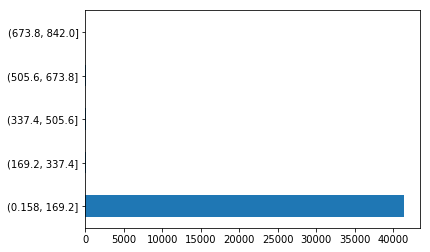

In [28]:
bins.plot(kind='barh')

In [29]:
category_counts = find1s.values
category_counts

array([842, 794, 757, ...,   1,   1,   1], dtype=int64)

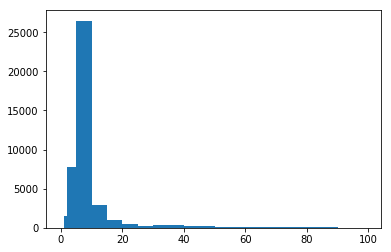

In [30]:
#what i want is the distribution of times that value counts for each category fall from from 1-100, 101-200, 201-300, 
plt.hist(category_counts, bins=[0,1,2,5,10,15,20,25,30,40,50,60,70,80,90,99])
plt.style.use('ggplot')
plt.show()

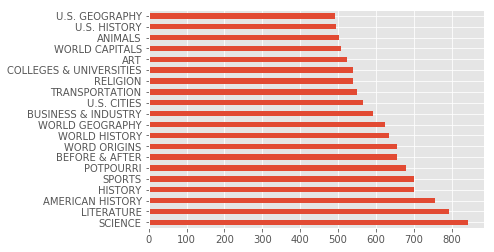

In [31]:
Jeopardy1_35['category'].value_counts()[:20].plot(kind='barh')

In [32]:
#for category in category list
#search for that category in df1
#create new dataframe from df1 that contains name of category
#continue to create new for every category in category list

In [33]:
Jeopardy1_35.head()

,round,value,daily_double,category,comments,answer,question,air_data,notes,air_date
0,1,100,no,LAKES & RIVERS,-,River mentioned most often in the Bible,the Jordan,NaN,-,1984-09-10
1,1,200,no,LAKES & RIVERS,-,Scottish word for lake,loch,NaN,-,1984-09-10
2,1,400,no,LAKES & RIVERS,-,American river only 33 miles shorter than the ...,the Missouri,NaN,-,1984-09-10
3,1,500,no,LAKES & RIVERS,-,"World's largest lake, nearly 5 times as big as...",the Caspian Sea,NaN,-,1984-09-10
4,1,100,no,INVENTIONS,-,Marconi's wonderful wireless,the radio,NaN,-,1984-09-10


In [34]:
#Sets new df for For Loop to isolate category later
df1 = Jeopardy1_35[['category', 'question', 'answer']]
df1

,category,question,answer
0,LAKES & RIVERS,the Jordan,River mentioned most often in the Bible
1,LAKES & RIVERS,loch,Scottish word for lake
2,LAKES & RIVERS,the Missouri,American river only 33 miles shorter than the ...
3,LAKES & RIVERS,the Caspian Sea,"World's largest lake, nearly 5 times as big as..."
4,INVENTIONS,the radio,Marconi's wonderful wireless
5,INVENTIONS,the rickshaw,"In 1869 an American minister created this ""ori..."
6,INVENTIONS,freezing,A 1920's hunting trip to Canada inspired Birds...
7,INVENTIONS,a zipper,This fastener gets its name from a brand of ga...
8,ANIMALS,rats,These rodents first got to America by stowing ...
9,ANIMALS,the trunk,"There are about 40,000 muscles & tendons in th..."


In [35]:
#Sets list of unique categories
uniquecategories = df1.category.unique()

In [36]:
#Initialzies a dictionary where the key is the unique cateogry and the value is an empty dataframe
categorydf = {elem : pd.DataFrame() for elem in uniquecategories}

In [37]:
#Confirms category df is created
categorydf

{'LAKES & RIVERS': Empty DataFrame
 Columns: []
 Index: [], 'INVENTIONS': Empty DataFrame
 Columns: []
 Index: [], 'ANIMALS': Empty DataFrame
 Columns: []
 Index: [], 'FOREIGN CUISINE': Empty DataFrame
 Columns: []
 Index: [], 'ACTORS & ROLES': Empty DataFrame
 Columns: []
 Index: [], 'THE BIBLE': Empty DataFrame
 Columns: []
 Index: [], "\\'50'S TV": Empty DataFrame
 Columns: []
 Index: [], 'NATIONAL LANDMARKS': Empty DataFrame
 Columns: []
 Index: [], 'NOTORIOUS': Empty DataFrame
 Columns: []
 Index: [], '4-LETTER WORDS': Empty DataFrame
 Columns: []
 Index: [], 'HOLIDAYS': Empty DataFrame
 Columns: []
 Index: [], 'STATE CAPITALS': Empty DataFrame
 Columns: []
 Index: [], "THE '40'S": Empty DataFrame
 Columns: []
 Index: [], 'TRANSPORTATION': Empty DataFrame
 Columns: []
 Index: [], 'COUNTRY MUSIC': Empty DataFrame
 Columns: []
 Index: [], 'BY THE NUMBERS': Empty DataFrame
 Columns: []
 Index: [], 'WILD WEST': Empty DataFrame
 Columns: []
 Index: [], 'OPERA': Empty DataFrame
 Columns

In [39]:
#A for loop that iterates through each category in my dictionary and populates the values with the subset of rows from my master dataframe where the category is my current category
for category in categorydf.keys():
    categorydf[category] = Jeopardy1_35[:][df1.category == category]

In [40]:
#Confirms df created for category
categorydf['SCIENCE']

,round,value,daily_double,category,comments,answer,question,air_data,notes,air_date
304,3,0,no,SCIENCE,-,The mammal that holds the record for the longe...,man,NaN,-,1984-09-20
1017,2,200,no,SCIENCE,-,Fahrenheit equivalent to 0º Centigrade,32,NaN,-,1984-11-28
1018,2,400,no,SCIENCE,-,You might have to put F. Lee Bailey on one to ...,a lie detector,NaN,-,1984-11-28
1019,2,600,no,SCIENCE,-,The science which deals with the motion & beha...,ballistics,NaN,-,1984-11-28
1020,2,800,no,SCIENCE,-,"What you're ""stuck with"" boiling down collagen...",glue,NaN,-,1984-11-28
1021,2,1000,no,SCIENCE,-,"In 1808, this metalsmith made copper plates fo...",Paul Revere,NaN,-,1984-11-28
1037,1,100,no,SCIENCE,-,A sound's repetition by reflection,an echo,NaN,-,1984-11-29
1038,1,200,no,SCIENCE,-,"He originated ""The Origin of Species\""",Charles Darwin,NaN,-,1984-11-29
1039,1,300,no,SCIENCE,-,"Singular form of the word ""bacteria\""",bacterium,NaN,-,1984-11-29
1040,1,400,no,SCIENCE,-,Negative particle that orbits an atom's nucleus,an electron,NaN,-,1984-11-29


In [43]:
#Confirms df created for second category
categorydf['THE BIBLE']

,round,value,daily_double,category,comments,answer,question,air_data,notes,air_date
22,2,200,no,THE BIBLE,-,"When ""Joshua Fit The Battle Of Jericho"", these...",the walls,NaN,-,1984-09-10
23,2,400,no,THE BIBLE,-,His price was 30 pieces of silver,Judas,NaN,-,1984-09-10
24,2,600,no,THE BIBLE,-,"According to the Bible, it wasn't necessarily ...",the forbidden fruit (or the fruit of the Tree ...,NaN,-,1984-09-10
25,2,800,no,THE BIBLE,-,"Though its name means ""city of peace"", it's se...",Jerusalem,NaN,-,1984-09-10
26,2,1000,no,THE BIBLE,-,"According to 1st Timothy, it is the ""root of a...",the love of money,NaN,-,1984-09-10
1095,1,100,no,THE BIBLE,-,"The longest of the 2 ""Testaments\""",the Old,NaN,-,1984-12-03
1096,1,200,no,THE BIBLE,-,He lived to be 969 years old,Methuselah,NaN,-,1984-12-03
1097,1,300,no,THE BIBLE,-,"Jesus said that only ""he that is without sin"" ...",cast the first stone,NaN,-,1984-12-03
1296,1,100,no,THE BIBLE,-,The 2nd book of the Old Testament,Exodus,NaN,-,1984-12-07
1297,1,200,no,THE BIBLE,-,Image of worship built of old jewelry while Mo...,the golden calf,NaN,-,1984-12-07


In [ ]:
#Checks information out for random category df
categorydf['NORSE GODS'].info

In [ ]:
#Confirms all categories able to be accessed
uniquecategories

In [44]:
specific_category = categorydf['THE BIBLE']

In [45]:
#gets array of answers for specific category
specific_answers = specific_category.answer.values
specific_answers

array(['When "Joshua Fit The Battle Of Jericho", these took a tumble',
       'His price was 30 pieces of silver',
       "According to the Bible, it wasn't necessarily an apple",
       'Though its name means "city of peace", it\'s seen over 30 wars, the last in 1967',
       'According to 1st Timothy, it is the "root of all evil\\"',
       'The longest of the 2 "Testaments\\"',
       'He lived to be 969 years old',
       'Jesus said that only "he that is without sin" could do this',
       'The 2nd book of the Old Testament',
       'Image of worship built of old jewelry while Moses was on the mountain',
       'The Bible says he was swallowed by a "great fish", not a whale',
       '1st queen mentioned in the Bible was this royal visitor of Solomon',
       'It warned the last Babylonian king of his approaching doom',
       "In Exodus 3, it burned but wouldn't burn up",
       'Nephew whom Abraham rescued in Gen. 14, he also needed rescuing from Sodom by Gen. 19',
       'King w

In [46]:
#turns specific answers array into a list
specific_answers_list = specific_answers.tolist()
specific_answers_list

['When "Joshua Fit The Battle Of Jericho", these took a tumble',
 'His price was 30 pieces of silver',
 "According to the Bible, it wasn't necessarily an apple",
 'Though its name means "city of peace", it\'s seen over 30 wars, the last in 1967',
 'According to 1st Timothy, it is the "root of all evil\\"',
 'The longest of the 2 "Testaments\\"',
 'He lived to be 969 years old',
 'Jesus said that only "he that is without sin" could do this',
 'The 2nd book of the Old Testament',
 'Image of worship built of old jewelry while Moses was on the mountain',
 'The Bible says he was swallowed by a "great fish", not a whale',
 '1st queen mentioned in the Bible was this royal visitor of Solomon',
 'It warned the last Babylonian king of his approaching doom',
 "In Exodus 3, it burned but wouldn't burn up",
 'Nephew whom Abraham rescued in Gen. 14, he also needed rescuing from Sodom by Gen. 19',
 'King whose reign was so rich that silver was said to have been as common as stones in Jerusalem',
 "He

In [47]:
#gets aray of questions for specific category
specific_questions = specific_category .question.values
specific_questions

array(['the walls', 'Judas',
       'the forbidden fruit (or the fruit of the Tree of Knowledge)',
       'Jerusalem', 'the love of money', 'the Old', 'Methuselah',
       'cast the first stone', 'Exodus', 'the golden calf', 'Jonah',
       'Queen of Sheba', 'handwriting on the wall', 'the burning bush',
       'Lot', 'Solomon', 'Thomas (or Didymus)', 'Armageddon', 'fishes',
       'silver', 'lyre (or harp)', 'Job', 'wine', 'Joshua', 'Seth',
       'Paul', 'ye shall find', 'swaddling clothes', 'golden calf',
       'Canaan', 'what the right hand is doing', 'I shall not want',
       'ten plagues', 'Armageddon', 'Damascus', 'Jesus wept.', 'the Lord',
       'Esau', 'Solomon', 'Goshen', 'mother-in-law', 'Judah', 'Paul',
       "the lions' den", 'the Nile', 'the fiery furnace', 'Jonah',
       'the devil (Satan)', 'Adam', 'Joshua', 'Caesar (Tiberius)',
       'sundial', 'Peter', 'the Earth', 'Ruth', 'their spears',
       'eat, drink, & be merry', 'the Serpent',
       'Goliath (Raphah or

In [48]:
#turns array into list
specific_questions_list = specific_questions.tolist()
specific_questions_list

['the walls',
 'Judas',
 'the forbidden fruit (or the fruit of the Tree of Knowledge)',
 'Jerusalem',
 'the love of money',
 'the Old',
 'Methuselah',
 'cast the first stone',
 'Exodus',
 'the golden calf',
 'Jonah',
 'Queen of Sheba',
 'handwriting on the wall',
 'the burning bush',
 'Lot',
 'Solomon',
 'Thomas (or Didymus)',
 'Armageddon',
 'fishes',
 'silver',
 'lyre (or harp)',
 'Job',
 'wine',
 'Joshua',
 'Seth',
 'Paul',
 'ye shall find',
 'swaddling clothes',
 'golden calf',
 'Canaan',
 'what the right hand is doing',
 'I shall not want',
 'ten plagues',
 'Armageddon',
 'Damascus',
 'Jesus wept.',
 'the Lord',
 'Esau',
 'Solomon',
 'Goshen',
 'mother-in-law',
 'Judah',
 'Paul',
 "the lions' den",
 'the Nile',
 'the fiery furnace',
 'Jonah',
 'the devil (Satan)',
 'Adam',
 'Joshua',
 'Caesar (Tiberius)',
 'sundial',
 'Peter',
 'the Earth',
 'Ruth',
 'their spears',
 'eat, drink, & be merry',
 'the Serpent',
 'Goliath (Raphah or Lahmi)',
 'Goliath',
 'Jericho',
 'stones',
 'Ishmae

In [ ]:
#creates variable to get random category
x = random.choice(uniquecategories)
print(x)

In [ ]:
#accesses random category df
categorydf[x]

In [ ]:
print(categorydf[x].answer.values)

In [ ]:
categorydf[x].answer.values

In [ ]:
#creates array from answers for random category
random_answers = categorydf[x].answer.values
random_answers

In [ ]:
#creates list of answers from array of random categories
random_answers_list = random_answers.tolist()
random_answers_list

In [ ]:
#creates array of questions from random category
random_questions = categorydf[x].question.values
random_questions

In [ ]:
#creates list of questions from array
random_questions_list = random_questions.tolist()
random_questions_list

In [54]:
from random import sample

In [49]:
#gets user input of if they want the quiz to be a random category or specific category
playerchoice = input('Random Category OR Specific Category')
if playerchoice == 'Random Category':
    answers_list = random_answers_list
    questions_list = random_questions_list
else:
    answers_list = specific_answers_list
    questions_list = specific_questions_list

Random Category OR Specific CategorySpecific Category


In [55]:
#sets sample size for quiz questions based on length of list
if len(answers_list) >=5: 
    samplesize = 5
else:
    samplesize = len(answers_list)

In [62]:
#QUIZ! answers_list and questions_list determined by user input Random Category or Specific Category in prior code

Questions = answers_list
             

Answers = questions_list
           

num_right = 0

# Personal taste, I prefer the zipped list of Q & A rather than an index lookup in the for loop
# Ex: key[0] == ('What is the capital of the United States of America? ', 'Washington DC')
# Final note, the zip function returns a generator, so we need to transform it to a list object for sample()
key = zip(Questions, Answers)
key = list(key)

# Sample from key now instead of Questions
s = sample(key, samplesize)

for i in s:
    # in each "i" tuple [0] is the question, [1] is the answer
    print(i[0])
    user_answer = input('Your Guess: ')
    Ratio = fuzz.ratio(user_answer.lower(),i[1].lower())
    Partial_Ratio = fuzz.partial_ratio(user_answer.lower(),i[1].lower())
    Token_Sort_Ratio = fuzz.token_sort_ratio(user_answer,i[1])
    Token_Set_Ratio = fuzz.token_set_ratio(user_answer,i[1])
    if Ratio > 75 or Partial_Ratio > 75 or Token_Sort_Ratio > 75 or Token_Set_Ratio > 75:
        print('Correct')
        num_right += 1
    else:
        print('Not Correct')
# Added a final fraction of correct statement
print('{}/5 Questions Correct'.format(num_right))

Leviticus 13:45 says to go about crying "unclean" if one has the disease commonly translated as this
Your Guess: leprosy
Correct
While this king was boasting about Babylon, a voice from heaven said, "The kingdom is departed from thee\"
Your Guess: solomon
Not Correct
Type of timepiece mentioned in Isaiah 38:8
Your Guess: sun dial
Correct
After he was called forth from the dead, he appeared "bound hand and foot with graveclothes\"
Your Guess: jesus
Not Correct
While Moses was on Mount Sinai, his brother Aaron made this heathen idol for the Israelites to worship
Your Guess: golden calf
Correct
3/5 Questions Correct


In [63]:
s

[('Leviticus 13:45 says to go about crying "unclean" if one has the disease commonly translated as this',
  'leprosy'),
 ('While this king was boasting about Babylon, a voice from heaven said, "The kingdom is departed from thee\\"',
  'Nebuchadnezzar'),
 ('Type of timepiece mentioned in Isaiah 38:8', 'sundial'),
 ('After he was called forth from the dead, he appeared "bound hand and foot with graveclothes\\"',
  'Lazarus'),
 ('While Moses was on Mount Sinai, his brother Aaron made this heathen idol for the Israelites to worship',
  'The golden calf')]

In [ ]:
Str1 = "The supreme court case of Nixon vs The United States"
Str2 = "Nixon v. United States"
Ratio = fuzz.ratio(Str1.lower(),Str2.lower())
Partial_Ratio = fuzz.partial_ratio(Str1.lower(),Str2.lower())
Token_Sort_Ratio = fuzz.token_sort_ratio(Str1,Str2)
Token_Set_Ratio = fuzz.token_set_ratio(Str1,Str2)
print(Ratio)
print(Partial_Ratio)
print(Token_Sort_Ratio)
print(Token_Set_Ratio)
if Ratio > 75 or Partial_Ratio > 75 or Token_Sort_Ratio > 75 or Token_Set_Ratio > 75:
    print('Correct')

In [ ]:
print(questions_list)

In [ ]:
s